In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier #import classifier, not regressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline


In [2]:
df = pd.read_csv('/Users/mahinbindra/Downloads/titanic.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


   survived  pclass     sex   age  sibsp  parch     fare embarked  class   
0         0       3    male  22.0      1      0   7.2500        S  Third  \
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


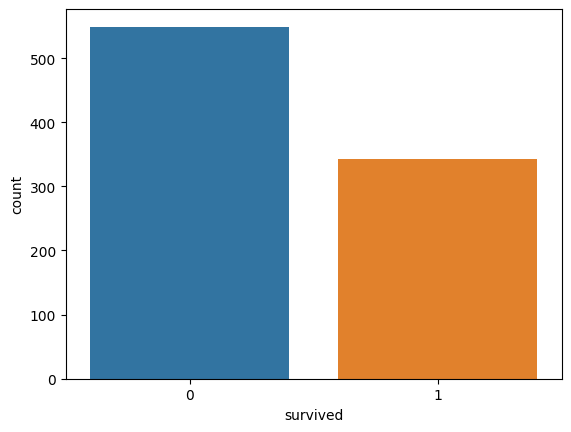

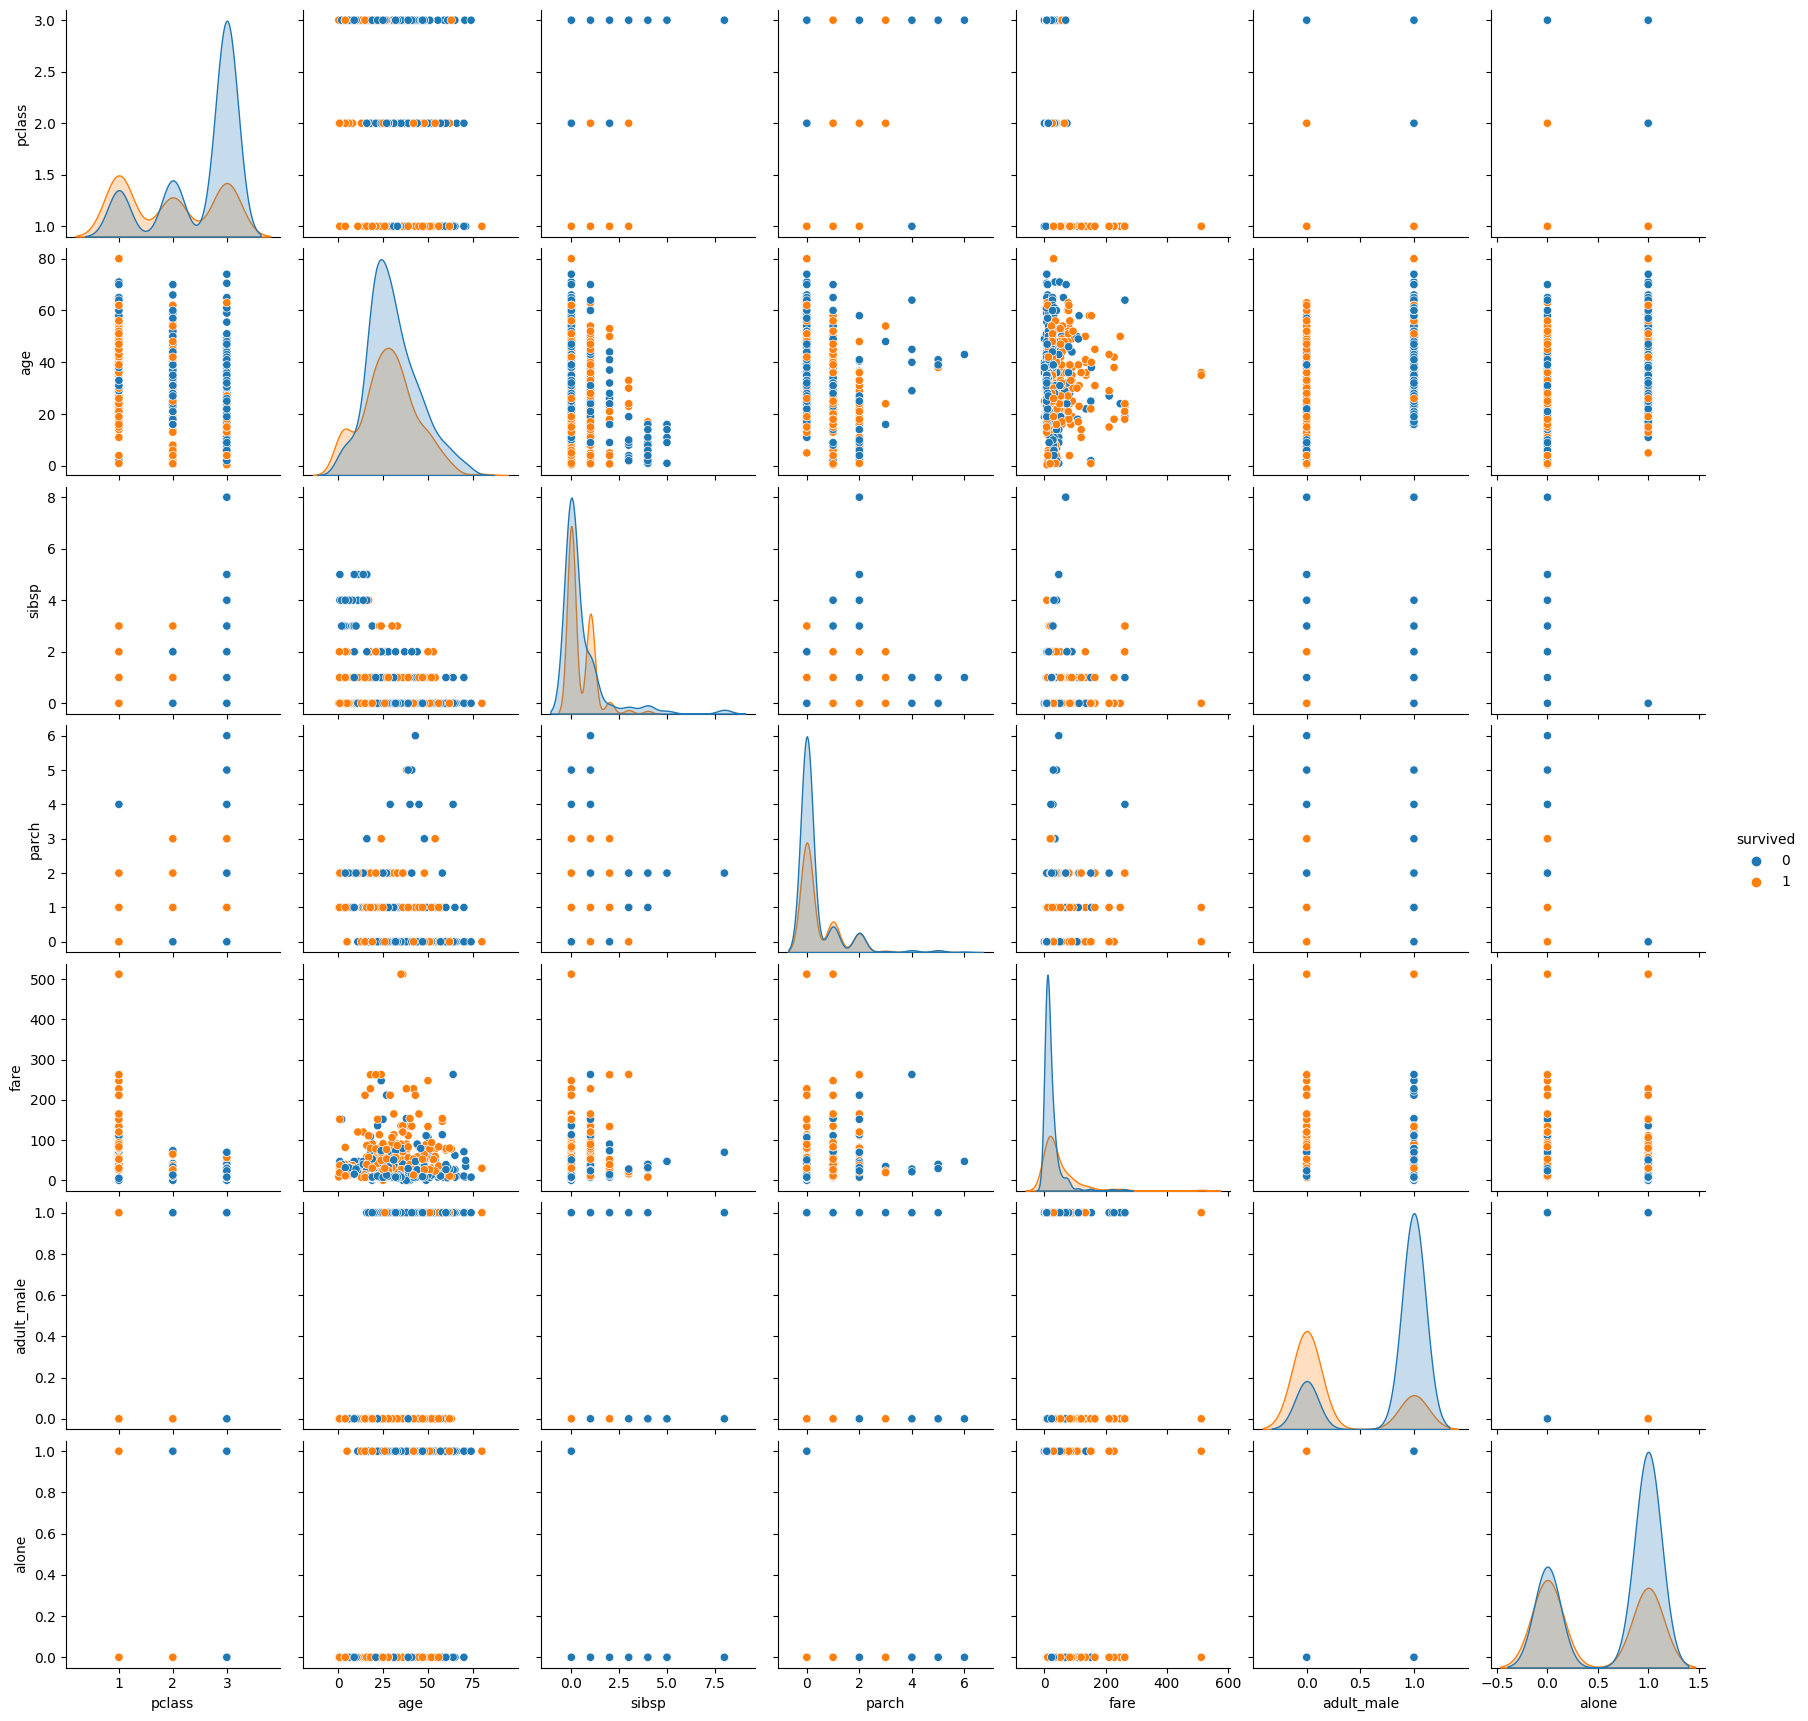

In [6]:
# Print the first few rows of the dataframe
print(df.head())

# Display the distribution of 'Survived'
sns.countplot(x='survived', data=df)
plt.show()

# More detailed exploration
sns.pairplot(df, hue='survived')
plt.show()


In [96]:
from sklearn.datasets import load_iris

In [97]:
data = load_iris()

In [98]:
iris = pd.DataFrame(np.c_[data['data'],data['target']])

In [99]:
iris.rename(columns={0:'sepal length',1:'sepal width',2:'petal lenght', 3:'petal width', 4:'target'}, inplace=True)

In [100]:
iris.head()

,sepal length,sepal width,petal lenght,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


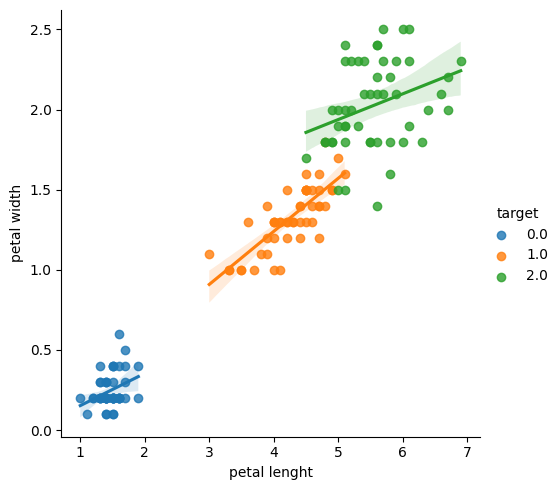

In [101]:
sns.lmplot(x='petal lenght', y='petal width', hue = 'target', data=iris)

In [7]:
# drop useless columns
df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

KeyError: "['Ticket', 'Cabin'] not found in axis"

In [8]:
# find missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [104]:
# clean missing data
df['age'] = df['age'].fillna(df.groupby('sex')['age'].transform('mean'))
df['embarked'] = df['embarked'].fillna('S')

In [105]:
cat_columns = ['Pclass','Sex','Embarked']
num_columns = ['Age','SibSp','Parch','Fare']
target = 'Survived'

In [106]:
# build pipeline
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [107]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)



In [108]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [109]:
x_train_transformed.shape

(712, 12)

In [110]:
x_test_transformed.shape

(179, 12)

In [111]:
encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns))
all_feat = num_columns + encoded_columns

X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)


In [124]:
accuracies = []

for a in range(1,100):
        
    knn = KNeighborsClassifier(n_neighbors = 10)
    knn.fit(X_train_transformed, y_train)
    y_pred = knn.predict(X_test_transformed)
    # print(f1_score(y_pred, y_test))
    accuracies.append(accuracy_score(y_pred, y_test))

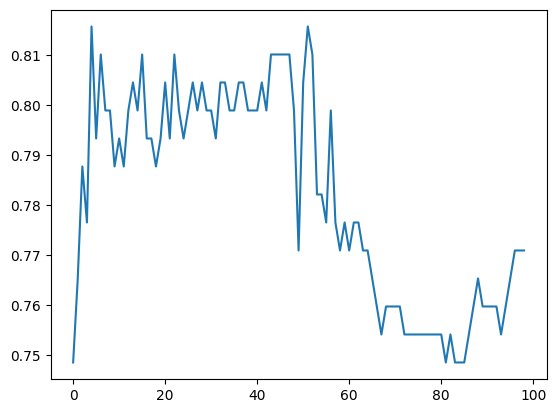

In [125]:
plt.plot(accuracies)

In [132]:
# Hyperparameter tuning
# select parameters
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
params_knn = {'n_neighbors': list(range(1,100)), 'weights': ['uniform', 'distance']}

# Define the models
nb = GaussianNB()
knn = KNeighborsClassifier()

# Define GridSearchCV
gridsearch_nb = GridSearchCV(nb, params_nb, cv=5, scoring='roc_auc')
    #nb, params_nb, cv=5)
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, scoring='roc_auc')

# Fit models
gridsearch_nb.fit(X_train_transformed, y_train)
randomsearch_knn.fit(X_train_transformed, y_train)

# Get the best parameters
print("Best parameters for Naive Bayes: ", gridsearch_nb.best_params_)
print("Best parameters for KNN: ", randomsearch_knn.best_params_)

Best parameters for Naive Bayes:  {'var_smoothing': 1.0}
Best parameters for KNN:  {'weights': 'uniform', 'n_neighbors': 17}


In [67]:
# Apply the best parameters
nb_best = GaussianNB(**gridsearch_nb.best_params_)
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_) #** means keyword argument

# Perform cross-validation
cv_scores_nb = cross_val_score(nb_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
cv_scores_knn = cross_val_score(knn_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')

print("Cross-validation scores for Naive Bayes: ", cv_scores_nb)
print("Cross-validation scores for KNN: ", cv_scores_knn)

# Fit the models with the best parameters
nb_best.fit(X_train_transformed, y_train)
knn_best.fit(X_train_transformed, y_train)

# Evaluate on the test set
y_pred_nb = nb_best.predict(X_test_transformed)
y_pred_knn = knn_best.predict(X_test_transformed)

print("Test accuracy for Naive Bayes: ", accuracy_score(y_test, y_pred_nb))
print("Test accuracy for KNN: ", accuracy_score(y_test, y_pred_knn))

Cross-validation scores for Naive Bayes:  [0.8585102  0.82532251 0.83994064 0.7758109  0.85690236]
Cross-validation scores for KNN:  [0.86329588 0.8343737  0.83644265 0.81927072 0.85816498]
Test accuracy for Naive Bayes:  0.770949720670391
Test accuracy for KNN:  0.7932960893854749


In [133]:
# Compute metrics
print("Naive Bayes Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_nb))
print("Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("Precision: ", precision_score(y_test, y_pred_nb))
print("Recall: ", recall_score(y_test, y_pred_nb))
print("F1 Score: ", f1_score(y_test, y_pred_nb))

print("\nK-Nearest Neighbors Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))

Naive Bayes Metrics: 
Confusion Matrix:  [[87 18]
 [23 51]]
Accuracy:  0.770949720670391
Precision:  0.7391304347826086
Recall:  0.6891891891891891
F1 Score:  0.7132867132867132

K-Nearest Neighbors Metrics: 
Confusion Matrix:  [[92 13]
 [24 50]]
Accuracy:  0.7932960893854749
Precision:  0.7936507936507936
Recall:  0.6756756756756757
F1 Score:  0.72992700729927
